In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import theano
import tensorflow
import keras

print('scipy ' + scipy.__version__)
print('numpy ' + numpy.__version__)
print('matplotlib ' + matplotlib.__version__)
print('pandas ' + pandas.__version__)
print('sklearn ' + sklearn.__version__)
print('pydot ' + pydot.__version__)
print('h5py ' + h5py.__version__)

print('theano ' + theano.__version__)
print('tensorflow ' + tensorflow.__version__)
print('keras ' + keras.__version__)

scipy 1.2.1
numpy 1.16.1
matplotlib 2.2.3
pandas 0.24.1
sklearn 0.20.2
pydot 1.4.1
h5py 2.9.0
theano 1.0.4
tensorflow 1.12.0
keras 2.2.4


Using TensorFlow backend.


In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

11501568/11490434 [==============================] - 7s 1us/step
Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.6715 - acc: 0.8291
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3450 - acc: 0.9026
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2987 - acc: 0.9154
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2712 - acc: 0.9235: 0s - loss: 0
Epoch 5/5
10000/10000 [==============================] - 0s 33us/step
loss_and_metrics : [0.23164346994757654, 0.9335]


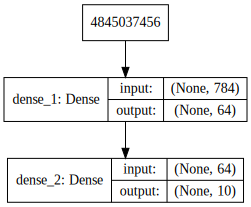

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [4]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

65536/57026 [==================================] - 0s 6us/step


In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 0)
('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 1)
('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 2)
('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 3)


In [9]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 0)
('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 1)
('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 2)
('\xec\xb2\x98\xeb\xa6\xac\xec\xa4\x91\xec\x9d\xb8 \xed\x8f\xb4\xeb\x93\x9c #', 3)


In [10]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

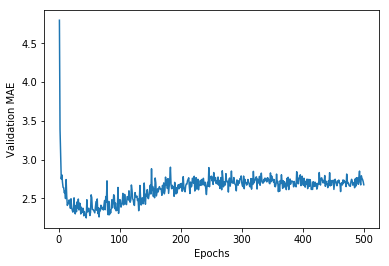

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


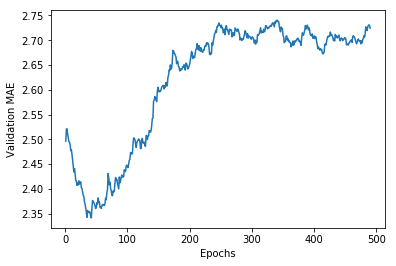

In [13]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [14]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step
